# Regression Linéaire avec Données Synthétiques

In [34]:
#%pip install -U numpy
#%pip install -U pandas
#%pip install -U matplotlib
#%pip install -U scipy
#%pip install -U statsmodels
#%pip install -U scikit-learn
#%pip install -U "jax[cpu]"
#%pip install -U torch
#%pip install -U tensorflow

## Données

Création d'un jeu de données synthétiques:

In [60]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

random_state = 42

# Create features and labels
X, y = make_regression(n_samples=100, n_features=2, n_targets=1, noise=2.0, random_state=random_state)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Check shapes
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 2) (20, 2) (80,) (20,)


Visualisation:

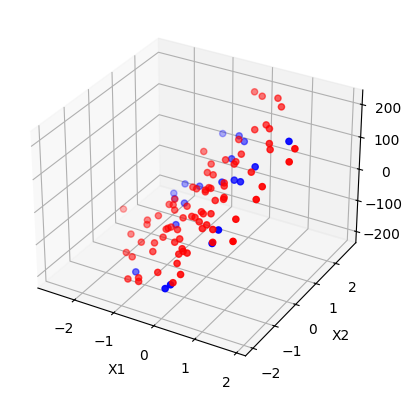

In [65]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='train')
ax.scatter(X_test[:,0], X_test[:,1], y_test, marker='o', c='b', label='test')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.show()

Autres données pour visualisation 3D du plan de regression linéaire:

In [69]:
import numpy as np

# Data for 3D visualization
x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 40)
x2_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 40)
x1_values, x2_values = np.meshgrid(x1_range, x2_range)
X_surface = np.column_stack((x1_values.ravel(), x2_values.ravel()))
X_surface

array([[-2.6197451 , -1.98756891],
       [-2.50420841, -1.98756891],
       [-2.38867172, -1.98756891],
       ...,
       [ 1.65511252,  2.72016917],
       [ 1.77064921,  2.72016917],
       [ 1.8861859 ,  2.72016917]])

## Régression Linéaire Univariée avec SciPy

> SciPy ne supporte pas la régression multivariée

Docs: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [84]:
from scipy.stats import linregress

# linregress du package SciPy ne supporte pas la régression multivariée
# result = linregress(X_train, y_train)

# Deux regressions univariées comme ci-dessous, ne sont pas équivalentes à une regression multivariée (plan multidimensionnel).
# La suite permet seulement d'illustrer un exemple de régression univariée (droite dans un plan).

result0 = linregress(X_train[:,0], y_train)
print(result0)

result1 = linregress(X_train[:,1], y_train)
print(result1)

LinregressResult(slope=93.13395368381207, intercept=1.2795278391322515, rvalue=0.7474700335260295, pvalue=1.6630344170636729e-15, stderr=9.37191371020226, intercept_stderr=8.257929064833903)
LinregressResult(slope=79.25737511543441, intercept=-12.107979631058576, rvalue=0.7126625041848988, pvalue=1.2218079646943333e-13, stderr=8.833656758532905, intercept_stderr=8.613276950790993)


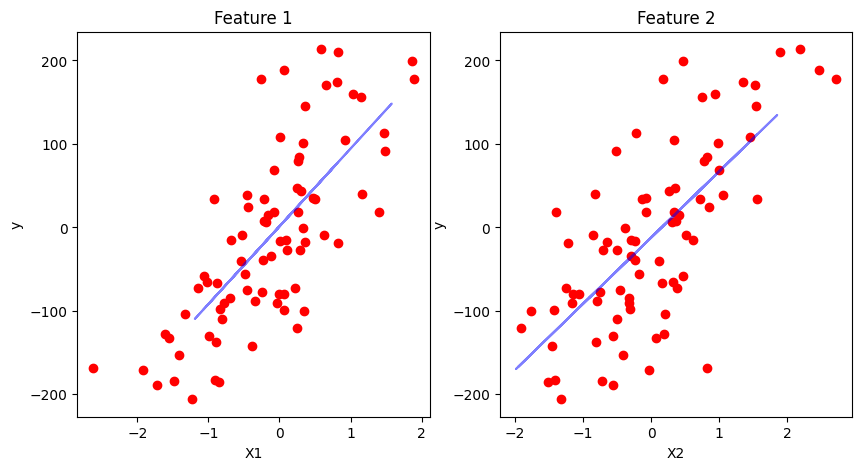

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.scatter(X_train[:,0], y_train, c='r')
ax1.plot(X_test[:,0], result0.slope * X_test[:,0] + result0.intercept, c='b', alpha=0.5)
ax1.set(title='Feature 1', xlabel='X1', ylabel='y')
ax2.scatter(X_train[:,1], y_train, c='r')
ax2.plot(X_test[:,1], result1.slope * X_test[:,1] + result1.intercept, c='b', alpha=0.5)
ax2.set(title='Feature 2', xlabel='X2', ylabel='y')
plt.show()

# Régression Linéaire Multivariée avec StatsModels

Docs: https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html

In [80]:
import statsmodels.api as sm

# Add constant for intercept
X_train_ = sm.add_constant(X_train)
X_test_ = sm.add_constant(X_test)

# Train and predict
model = sm.OLS(y_train, X_train_).fit()
y_pred = model.predict(X_test_) 

# Show summary
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.291e+05
Date:                Wed, 27 Dec 2023   Prob (F-statistic):          1.53e-156
Time:                        18:22:04   Log-Likelihood:                -115.65
No. Observations:                  80   AIC:                             237.3
Df Residuals:                      77   BIC:                             244.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.119      0.056      0.9

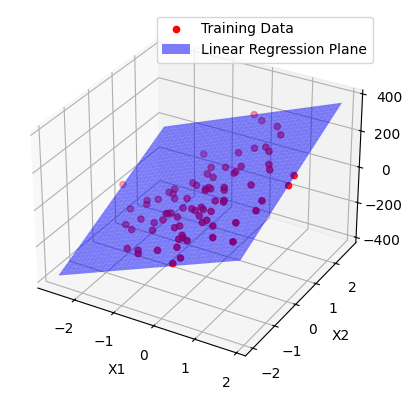

In [81]:
X_surface_ = sm.add_constant(X_surface)
y_surface = model.predict(X_surface_)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec SciKit-Learn

Docs: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Fit the regressor
model = LinearRegression().fit(X_train, y_train)
print(model.coef_, model.intercept_)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


[87.59459501 74.0361035 ] 0.0065954803643197835
Mean squared error: 1.55
Coefficient of determination: 1.00


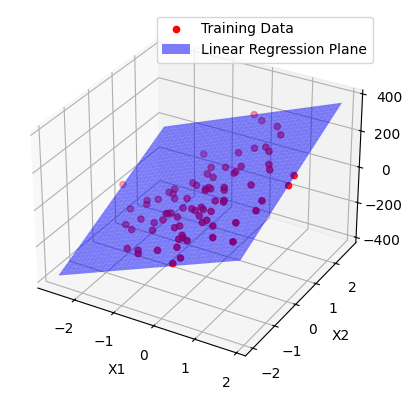

In [71]:
y_surface = model.predict(X_surface)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec Jax

Docs: https://jax.readthedocs.io/en/latest/

In [72]:
from jax import grad, jit
import jax.numpy as jnp

# Reshape y
y_train_ = y_train.reshape((y_train.shape[0],1))
y_test_ = y_test.reshape((y_test.shape[0],1))

# Loss function based on mean squared error (mse)
def loss(w,b,X,y):
  pred = X.dot(w) + b
  return ((pred-y)**2).mean()

# Initialize weights with zeros
Weights = jnp.zeros((X_train.shape[1],1))
bias = 0.

# Learning rate and epochs
l_rate = 0.01
n_iter = 3000

# Gradient functions wrapped with jit function for faster processing
gradW = jit(grad(loss, argnums=0))
gradb = jit(grad(loss, argnums=1))

# Training loop
for _ in range(n_iter):
  dW = gradW(Weights, bias, X_train, y_train_)
  db = gradb(Weights, bias, X_train, y_train_)
  # print(loss(Weights, bias, X_train, y_train_))
  Weights -= dW * l_rate
  bias -= db * l_rate

print(Weights, bias)

# Predictions
y_pred = X_test.dot(Weights) + bias

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

[[87.59433 ]
 [74.036316]] 0.0065565095
Mean squared error: 1.55
Coefficient of determination: 1.00


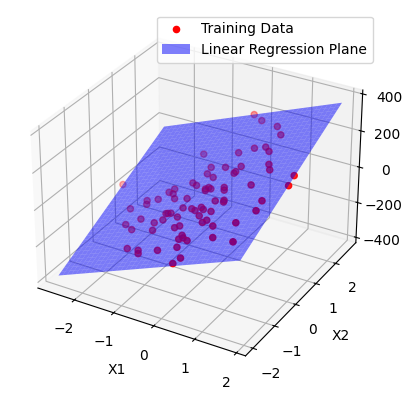

In [73]:
y_surface = X_surface.dot(Weights) + bias
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec PyTorch

Docs: https://pytorch.org/docs/stable/index.html

In [78]:
import torch
from torch.autograd import Variable

class TorchLR(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(TorchLR, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize, dtype=torch.float64)

    def forward(self, x):
        out = self.linear(x)
        return out
    
# Learning rate and epochs
l_rate = 0.001 
n_iter = 3000

inputDim = X.shape[1]   # takes variable 'x' 
outputDim = 1  # takes variable 'y'
model = TorchLR(inputDim, outputDim)
if torch.cuda.is_available():
    model.cuda()

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=l_rate)

# Training loop
for epoch in range(n_iter):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(X_train).cuda())
        labels = Variable(torch.from_numpy(y_train_).cuda())
    else:
        inputs = Variable(torch.from_numpy(X_train))
        labels = Variable(torch.from_numpy(y_train_))

    print(inputs.dtype, labels.dtype) 

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    
    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

# Predictions
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        y_pred = model(Variable(torch.from_numpy(X_test).cuda())).cpu().data.numpy()
    else:
        y_pred = model(Variable(torch.from_numpy(X_test))).data.numpy()

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

torch.float64 torch.float64
epoch 0, loss 11916.408382217865
torch.float64 torch.float64
epoch 1, loss 11872.379075177736
torch.float64 torch.float64
epoch 2, loss 11828.515753146596
torch.float64 torch.float64
epoch 3, loss 11784.817779938689
torch.float64 torch.float64
epoch 4, loss 11741.284521839707
torch.float64 torch.float64
epoch 5, loss 11697.915347597052
torch.float64 torch.float64
epoch 6, loss 11654.709628410183
torch.float64 torch.float64
epoch 7, loss 11611.666737920983
torch.float64 torch.float64
epoch 8, loss 11568.786052204174
torch.float64 torch.float64
epoch 9, loss 11526.066949757756
torch.float64 torch.float64
epoch 10, loss 11483.508811493492
torch.float64 torch.float64
epoch 11, loss 11441.111020727432
torch.float64 torch.float64
epoch 12, loss 11398.872963170483
torch.float64 torch.float64
epoch 13, loss 11356.794026918988
torch.float64 torch.float64
epoch 14, loss 11314.873602445374
torch.float64 torch.float64
epoch 15, loss 11273.111082588817
torch.float64 torc

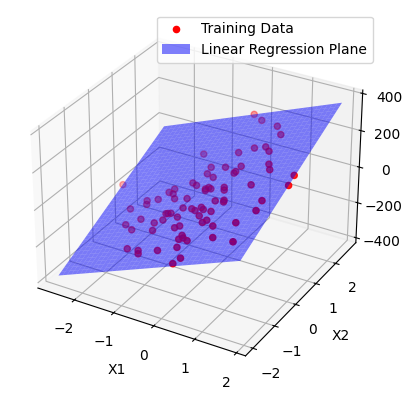

In [75]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        y_surface = model(Variable(torch.from_numpy(X_surface).cuda())).cpu().data.numpy()
    else:
        y_surface = model(Variable(torch.from_numpy(X_surface))).data.numpy()
    # print(y_pred)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()

## Régression Linéaire Multivariée avec Tensorflow

Docs:
- https://www.tensorflow.org/api_docs 
- https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb

In [82]:
import pandas as pd
import tensorflow as tf

l_rate=0.01
n_iter=500
batch_size=2

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=1))
# model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=l_rate),
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=l_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(x=X_train, y=y_train, batch_size=batch_size, epochs=n_iter)
trained_weight = model.get_weights()[0]
trained_bias = model.get_weights()[1]
epochs = history.epoch
hist = pd.DataFrame(history.history)
rmse = hist["root_mean_squared_error"]

y_pred = model.predict(X_test)

# Display mse and r2 score
print("Mean squared error: %.2f" % mean_squared_error(y_test_, y_pred))
print("Coefficient of determination: %.2f" % r2_score(y_test_, y_pred))

Epoch 1/500
40/40 [==============================] - 0s 451us/step - loss: 11622.0957 - root_mean_squared_error: 107.8058
Epoch 2/500
40/40 [==============================] - 0s 405us/step - loss: 11540.3496 - root_mean_squared_error: 107.4260
Epoch 3/500
40/40 [==============================] - 0s 398us/step - loss: 11461.7822 - root_mean_squared_error: 107.0597
Epoch 4/500
40/40 [==============================] - 0s 405us/step - loss: 11381.6738 - root_mean_squared_error: 106.6849
Epoch 5/500
40/40 [==============================] - 0s 403us/step - loss: 11300.5078 - root_mean_squared_error: 106.3038
Epoch 6/500
40/40 [==============================] - 0s 439us/step - loss: 11222.5518 - root_mean_squared_error: 105.9365
Epoch 7/500
40/40 [==============================] - 0s 417us/step - loss: 11142.2422 - root_mean_squared_error: 105.5568
Epoch 8/500
40/40 [==============================] - 0s 527us/step - loss: 11062.5400 - root_mean_squared_error: 105.1786
Epoch 9/500
40/40 [=====

50/50 [==============================] - 0s 417us/step


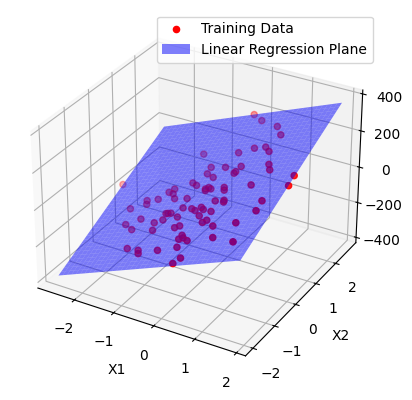

In [83]:
y_surface = model.predict(X_surface)
y_surface = y_surface.reshape(x1_values.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0], X_train[:,1], y_train, marker='o', c='r', label='Training Data')
ax.plot_surface(x1_values, x2_values, y_surface, alpha=0.5, color='b', label='Linear Regression Plane')
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.legend()
plt.show()